In [2]:
import pandas as pd
import numpy as np

In [3]:
# 读取CSV文件并指定编码
file_path = 'questionnaire_results.csv'
df = pd.read_csv(file_path, encoding='gbk')  # 使用gbk编码

# 定义需要转换的列（Q5~Q17）
likert_columns = ['Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17']

# 转换回答，将1, 2, 3, 4, 5转换为5, 4, 3, 2, 1
for column in likert_columns:
    df[column] = df[column].apply(lambda x: 6 - x if pd.notnull(x) else x)

# 按照受访者的身份类型进行分组
students_df = df[df['Q1'] == 1]  # Q1中回答为1的是学生
developers_teachers_df = df[df['Q1'] != 1]  # Q1中回答不为1的是开发者

print("转换后的整体数据：")
print(df[likert_columns])

print("转换后的学生数据：")
print(students_df[likert_columns])

print("转换后的开发者+教师数据：")
print(developers_teachers_df[likert_columns])

转换后的整体数据：
    Q5  Q6  Q7  Q8  Q9  Q10  Q11  Q12  Q13  Q14  Q15  Q16  Q17
0    5   4   4   4   4    4    4    4    4    5    4    4    3
1    5   4   4   5   4    4    5    5    4    5    3    4    4
2    5   4   4   5   4    5    5    5    3    4    4    4    5
3    4   5   4   3   4    4    5    5    3    2    5    4    5
4    5   5   3   5   5    4    5    3    3    5    5    5    3
5    4   5   4   4   4    4    5    3    4    4    3    5    4
6    4   4   4   5   3    4    4    5    3    4    4    3    4
7    4   5   4   5   5    4    4    4    5    4    3    4    4
8    5   5   5   4   5    5    4    3    4    5    5    2    5
9    4   4   4   5   5    4    4    5    4    2    4    5    4
10   4   4   2   3   3    3    4    4    4    4    4    4    4
11   5   5   4   3   3    2    5    5    5    4    5    5    4
12   5   5   4   3   4    5    5    5    5    5    5    5    4
13   4   4   4   4   4    4    4    4    4    4    4    4    4
14   4   5   2   3   2    2    4    5    4   

In [4]:
# 用于计算问卷第二部分第一小问的统计数据
def calculate_part2_q1_statistics(dataframe, exclude_columns=None):
    """
    计算指定数据集内各个小题及整体的平均值和方差。

    参数：
    dataframe: pd.DataFrame - 输入的数据集
    question_columns: list - 需要计算的题目列
    exclude_columns: list - 排除的题目列（可选）

    返回：
    dict - 各小题及整体的平均值和方差
    """
    question_columns = ['Q5', 'Q7', 'Q9', 'Q11', 'Q13', 'Q15']
    # 提取指定列数据并存储到数组中
    part_question = {col: dataframe[col].dropna().values for col in question_columns}
    # 计算各小题的平均值和方差
    question_stats = {question: {'mean': answers.mean(), 'variance': answers.var()} for question, answers in
                      part_question.items()}
    for question, stats in question_stats.items():
        print(f"{question} - 平均值: {stats['mean']:.3f}, 方差: {stats['variance']:.3f}")

    # 计算整体的平均值和方差
    combined_array = np.concatenate(list(part_question.values()))
    overall_mean = combined_array.mean()
    overall_variance = combined_array.var()
    print(f"整体平均值: {overall_mean:.3f}, 整体方差: {overall_variance:.3f}")

    # 计算整体大于4、等于3、小于等于2的比例
    print(
        f"整体 - 大于等于4的比例: {(combined_array >= 4).mean():.3f}; 等于3的比例: {(combined_array == 3).mean():.3f}; 小于等于2的比例: {(combined_array <= 2).mean():.3f}")

    # 如果提供了排除的列，计算排除后的整体平均值和方差
    if exclude_columns:
        filtered_question = {question: answers for question, answers in part_question.items() if
                             question not in exclude_columns}
        filtered_combined_array = np.concatenate(list(filtered_question.values()))
        filtered_overall_mean = filtered_combined_array.mean()
        filtered_overall_variance = filtered_combined_array.var()
        print(
            f"排除{exclude_columns}后的整体平均值: {filtered_overall_mean:.3f}, 整体方差: {filtered_overall_variance:.3f}")

    return question_stats


calculate_part2_q1_statistics(df, exclude_columns=['Q5', 'Q11'])
print("=" * 50)
calculate_part2_q1_statistics(students_df, exclude_columns=['Q5', 'Q11'])
print("=" * 50)
calculate_part2_q1_statistics(developers_teachers_df, exclude_columns=['Q5', 'Q11'])


Q5 - 平均值: 4.419, 方差: 0.476
Q7 - 平均值: 4.116, 方差: 0.707
Q9 - 平均值: 4.000, 方差: 0.605
Q11 - 平均值: 4.349, 方差: 0.460
Q13 - 平均值: 4.233, 方差: 0.551
Q15 - 平均值: 4.326, 方差: 0.685
整体平均值: 4.240, 整体方差: 0.601
整体 - 大于等于4的比例: 0.853; 等于3的比例: 0.116; 小于等于2的比例: 0.031
排除['Q5', 'Q11']后的整体平均值: 4.169, 整体方差: 0.652
Q5 - 平均值: 4.308, 方差: 0.598
Q7 - 平均值: 3.923, 方差: 0.840
Q9 - 平均值: 3.769, 方差: 0.639
Q11 - 平均值: 4.308, 方差: 0.521
Q13 - 平均值: 4.077, 方差: 0.533
Q15 - 平均值: 4.231, 方差: 0.716
整体平均值: 4.103, 整体方差: 0.682
整体 - 大于等于4的比例: 0.808; 等于3的比例: 0.141; 小于等于2的比例: 0.051
排除['Q5', 'Q11']后的整体平均值: 4.000, 整体方差: 0.712
Q5 - 平均值: 4.588, 方差: 0.242
Q7 - 平均值: 4.412, 方差: 0.360
Q9 - 平均值: 4.353, 方差: 0.346
Q11 - 平均值: 4.412, 方差: 0.360
Q13 - 平均值: 4.471, 方差: 0.484
Q15 - 平均值: 4.471, 方差: 0.602
整体平均值: 4.451, 整体方差: 0.404
整体 - 大于等于4的比例: 0.922; 等于3的比例: 0.078; 小于等于2的比例: 0.000
排除['Q5', 'Q11']后的整体平均值: 4.426, 整体方差: 0.450


{'Q5': {'mean': 4.588235294117647, 'variance': 0.24221453287197234},
 'Q7': {'mean': 4.411764705882353, 'variance': 0.35986159169550175},
 'Q9': {'mean': 4.352941176470588, 'variance': 0.3460207612456747},
 'Q11': {'mean': 4.411764705882353, 'variance': 0.35986159169550175},
 'Q13': {'mean': 4.470588235294118, 'variance': 0.4844290657439447},
 'Q15': {'mean': 4.470588235294118, 'variance': 0.6020761245674741}}

In [5]:
# 用于计算问卷第二部分第二小问的统计数据
def calculate_part2_q2_statistics(dataframe, exclude_columns=None):
    """
    计算指定数据集内各个小题及整体的平均值和方差。

    参数：
    dataframe: pd.DataFrame - 输入的数据集
    exclude_columns: list - 排除的题目列（可选）

    返回：
    dict - 各小题及整体的平均值和方差
    """
    question_columns = ['Q6', 'Q8', 'Q10', 'Q12', 'Q14', 'Q16']
    # 提取指定列数据并存储到数组中
    part_question = {column: dataframe[column].dropna().values for column in question_columns}

    # 计算各小题的平均值和方差
    question_stats = {question: {'mean': answers.mean(), 'variance': answers.var()} for question, answers in
                      part_question.items()}
    for question, stats in question_stats.items():
        print(f"{question} - 平均值: {stats['mean']:.3f}, 方差: {stats['variance']:.3f}")

    # 计算整体的平均值和方差
    combined_array = np.concatenate(list(part_question.values()))
    overall_mean = combined_array.mean()
    overall_variance = combined_array.var()
    print(f"整体平均值: {overall_mean:.3f}, 整体方差: {overall_variance:.3f}")

    # 计算整体大于4、等于3、小于等于2的比例
    print(
        f"整体大于等于4的比例: {(combined_array >= 4).mean():.3f}; 等于3的比例: {(combined_array == 3).mean():.3f}; 小于等于2的比例: {(combined_array <= 2).mean():.3f}")

    # 如果提供了排除的列，计算排除后的整体平均值和方差
    if exclude_columns:
        filtered_question = {question: answers for question, answers in part_question.items() if
                             question not in exclude_columns}
        filtered_combined_array = np.concatenate(list(filtered_question.values()))
        filtered_overall_mean = filtered_combined_array.mean()
        filtered_overall_variance = filtered_combined_array.var()
        print(
            f"排除{exclude_columns}后的整体平均值: {filtered_overall_mean:.3f}, 整体方差: {filtered_overall_variance:.3f}")

    return question_stats


# 示例调用函数计算开发者数据集的统计数据
calculate_part2_q2_statistics(df, exclude_columns=['Q6', 'Q12'])
#print("=" * 50)
#calculate_part2_q2_statistics(students_df, exclude_columns=['Q6', 'Q12'])
#print("=" * 50)
#calculate_part2_q2_statistics(developers_teachers_df, exclude_columns=['Q6', 'Q12'])

Q6 - 平均值: 4.442, 方差: 0.479
Q8 - 平均值: 4.140, 方差: 0.818
Q10 - 平均值: 4.186, 方差: 0.710
Q12 - 平均值: 4.488, 方差: 0.622
Q14 - 平均值: 4.186, 方差: 0.942
Q16 - 平均值: 4.372, 方差: 0.559
整体平均值: 4.302, 整体方差: 0.707
整体大于等于4的比例: 0.860; 等于3的比例: 0.097; 小于等于2的比例: 0.043
排除['Q6', 'Q12']后的整体平均值: 4.221, 整体方差: 0.765


{'Q6': {'mean': 4.441860465116279, 'variance': 0.4791779340183883},
 'Q8': {'mean': 4.1395348837209305, 'variance': 0.8177393185505677},
 'Q10': {'mean': 4.186046511627907, 'variance': 0.7095727420227153},
 'Q12': {'mean': 4.488372093023256, 'variance': 0.621957815035154},
 'Q14': {'mean': 4.186046511627907, 'variance': 0.9421308815575989},
 'Q16': {'mean': 4.372093023255814, 'variance': 0.5592212006489995}}

In [6]:
# 用于计算问卷第三部分第一小问的统计数据
def calculate_part3_q1_statistics(dataframe):
    """
    计算Q17的平均值和方差。
    参数：
    dataframe: pd.DataFrame - 输入的数据集
    返回：
    dict - Q17的平均值和方差
    """
    # 提取Q17的数据并存储到数组中
    part3_question1 = dataframe['Q17'].dropna().values
    # 计算Q17的平均值和方差
    question1_mean = part3_question1.mean()
    question1_variance = part3_question1.var()
    print(f"Q17 - 平均值: {question1_mean:.3f}, 方差: {question1_variance:.3f}")
    # 计算Q17中大于4、等于3、小于等于2的比例
    print(
        f"Q17 - 大于等于4的比例: {(part3_question1 >= 4).mean():.3f}; 等于3的比例: {(part3_question1 == 3).mean():.3f}; 小于等于2的比例: {(part3_question1 <= 2).mean():.3f}")

    # return {'mean': question1_mean, 'variance': question1_variance}


# 示例调用函数计算Q17的统计数据
calculate_part3_q1_statistics(df)
#print("=" * 50)
#calculate_part3_q1_statistics(students_df)
#print("=" * 50)
#calculate_part3_q1_statistics(developers_teachers_df)

Q17 - 平均值: 4.163, 方差: 0.601
Q17 - 大于等于4的比例: 0.814; 等于3的比例: 0.163; 小于等于2的比例: 0.023


In [7]:
# 首先计算各个群体的part2_q1, 即['Q5', 'Q7', 'Q9', 'Q11', 'Q13', 'Q15']中, 答案在1~2(不同意), 3(不确定), 4~5(同意)的平均人数
def calculate_part2_q1_avg_count(dataframe):
    """
    计算某群体在part2_q1, 即['Q5', 'Q7', 'Q9', 'Q11', 'Q13', 'Q15']中, 答案在1~2(不同意), 3(不确定), 4~5(同意)的平均人数
    参数：
    dataframe: pd.DataFrame - 输入的数据集
    返回：
    pd.DataFrame - 以字典形式返回学生群体的part2_q1数据
    """
    question_columns = ['Q5', 'Q7', 'Q9', 'Q11', 'Q13', 'Q15']
    # 提取指定列数据并存储到数组中
    part_question = {col: dataframe[col].dropna().values for col in question_columns}
    # 计算不同意、不确定、同意的人数
    combined_array = np.concatenate(list(part_question.values()))
    count_dict = {'disagree': (combined_array <= 2).sum(), 'neutral': (combined_array == 3).sum(),
                  'agree': (combined_array >= 4).sum()}

    # 计算不同意、不确定、同意的平均人数, 保留小数点后两位
    avg_count_dict = {key: round(value / len(question_columns), 1) for key, value in count_dict.items()}
    return avg_count_dict


print(calculate_part2_q1_avg_count(students_df))
print(calculate_part2_q1_avg_count(developers_teachers_df))


# 然后计算各个群体的part2_q2, 即['Q6', 'Q8', 'Q10', 'Q12', 'Q14', 'Q16']中, 答案在1~2(不同意), 3(不确定), 4~5(同意)的平均人数
def calculate_part2_q2_avg_count(dataframe):
    """
    计算某群体在part2_q2, 即['Q6', 'Q8', 'Q10', 'Q12', 'Q14', 'Q16']中, 答案在1~2(不同意), 3(不确定), 4~5(同意)的平均人数
    参数：
    dataframe: pd.DataFrame - 输入的数据集
    返回：
    pd.DataFrame - 以字典形式返回学生群体的part2_q2数据
    """
    question_columns = ['Q6', 'Q8', 'Q10', 'Q12', 'Q14', 'Q16']
    # 提取指定列数据并存储到数组中
    part_question = {col: dataframe[col].dropna().values for col in question_columns}
    # 计算不同意、不确定、同意的人数
    combined_array = np.concatenate(list(part_question.values()))
    count_dict = {'disagree': (combined_array <= 2).sum(), 'neutral': (combined_array == 3).sum(),
                  'agree': (combined_array >= 4).sum()}

    # 计算不同意、不确定、同意的平均人数, 保留小数点后两位
    avg_count_dict = {key: round(value / len(question_columns), 1) for key, value in count_dict.items()}
    return avg_count_dict


print(calculate_part2_q2_avg_count(students_df))
print(calculate_part2_q2_avg_count(developers_teachers_df))


# 然后计算各个群体part3_q1, 即['Q17']中, 答案在1~2(不同意), 3(不确定), 4~5(同意)的人数
def calculate_part3_q1_count(dataframe):
    """
    计算某群体在part3_q1, 即['Q17']中, 答案在1~2(不同意), 3(不确定), 4~5(同意)的人数
    参数：
    dataframe: pd.DataFrame - 输入的数据集
    返回：
    pd.DataFrame - 以字典形式返回学生群体的part3_q1数据
    """
    question_columns = ['Q17']
    # 提取指定列数据并存储到数组中
    part_question = {col: dataframe[col].dropna().values for col in question_columns}
    # 计算不同意、不确定、同意的人数
    combined_array = np.concatenate(list(part_question.values()))
    count_dict = {'disagree': (combined_array <= 2).sum(), 'neutral': (combined_array == 3).sum(),
                  'agree': (combined_array >= 4).sum()}
    return count_dict


print(calculate_part3_q1_count(students_df))
print(calculate_part3_q1_count(developers_teachers_df))

{'disagree': 1.3, 'neutral': 3.7, 'agree': 21.0}
{'disagree': 0.0, 'neutral': 1.3, 'agree': 15.7}
{'disagree': 1.5, 'neutral': 3.2, 'agree': 21.3}
{'disagree': 0.3, 'neutral': 1.0, 'agree': 15.7}
{'disagree': 1, 'neutral': 5, 'agree': 20}
{'disagree': 0, 'neutral': 2, 'agree': 15}


findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

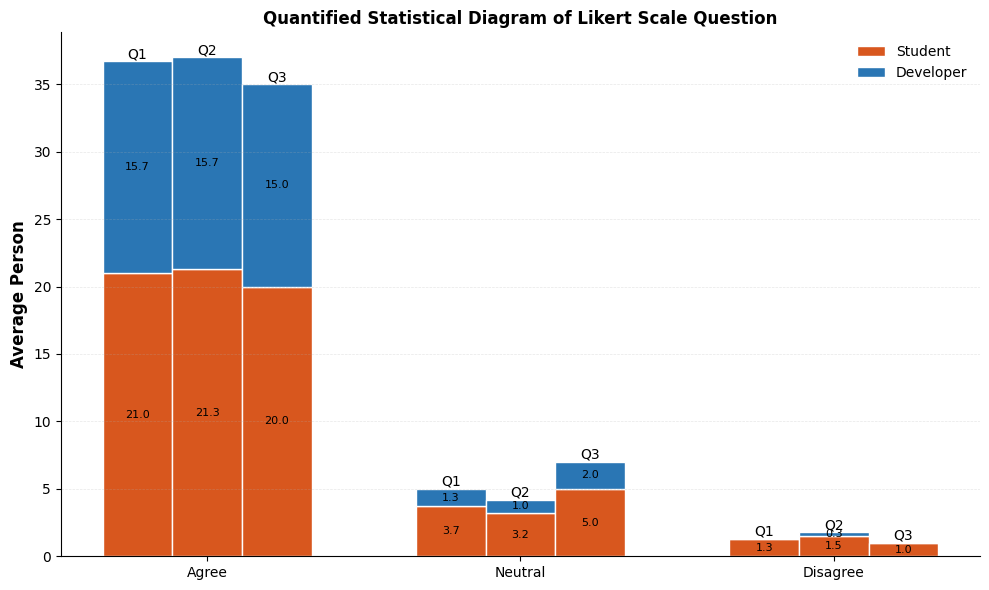

In [25]:
from matplotlib import pyplot as plt

# 绘制身份与李克特量表的堆积柱形图, 横轴为[同意,不确定,不同意], 纵轴为人数, 柱形的不同颜色代表不同身份, 柱形的堆积顺序从下到上分别为([学生, 教师+开发者])
# 堆积柱形图在横轴上的每个点上有两个柱形, 分别代表part2_q1和part2_q2
# students_df, developers_teachers_df

# 数据准备（使用已计算的函数结果）
data = {  # student + dev_teacher = 43人
    "q1": {
        "student": calculate_part2_q1_avg_count(students_df),
        "dev_teacher": calculate_part2_q1_avg_count(developers_teachers_df)
    },
    "q2": {
        "student": calculate_part2_q2_avg_count(students_df),
        "dev_teacher": calculate_part2_q2_avg_count(developers_teachers_df)
    },
    "q3": {
        "student": calculate_part3_q1_count(students_df),
        "dev_teacher": calculate_part3_q1_count(developers_teachers_df)
    }
}

# 创建画布
plt.figure(figsize=(10, 6))  # 调整画布大小
plt.rcParams['font.sans-serif'] = ['Times New Roman']  # 设置字体为Times New Roman
plt.rcParams['font.size'] = 10  # 设置字体大小为10pt

# 配置参数
categories = ['Agree', 'Neutral', 'Disagree']
bar_width = 0.2  # 调小柱宽
group_gap = 0.3  # 组间间距
x = np.arange(len(categories)) * (bar_width * 3 + group_gap)  # 新的坐标计算方式
colors = {
    'student': '#D8571E',  # 橙色（RGB: 216, 87, 30）
    'dev_teacher': '#2A76B4'  # 蓝色（RGB: 42, 118, 180）
}

# 绘制三组柱状图（part2_q1、part2_q2 和 part2_q3）
for i, part in enumerate(['q1', 'q2', 'q3']):
    # 计算每个柱子的位置
    positions = x + i * bar_width

    # 提取数据
    student_vals = [data[part]['student']['agree'],
                    data[part]['student']['neutral'],
                    data[part]['student']['disagree']]

    dev_teacher_vals = [data[part]['dev_teacher']['agree'],
                        data[part]['dev_teacher']['neutral'],
                        data[part]['dev_teacher']['disagree']]

    # 绘制堆积柱形图
    bottom = np.zeros(len(categories))
    student_bars = plt.bar(positions, student_vals, bar_width,
                           color=colors['student'], label='Student' if i == 0 else "",
                           edgecolor='white', bottom=bottom)

    bottom += student_vals
    dev_teacher_bars = plt.bar(positions, dev_teacher_vals, bar_width,
                               color=colors['dev_teacher'], label='Developer' if i == 0 else "",
                               edgecolor='white', bottom=bottom)

    # 添加顶部标签（"Q1"、"Q2"、"Q3"）
    for bar in dev_teacher_bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bar.get_y(),
                 f'{part.upper()}', ha='center', va='bottom', fontsize=10, color='black')

# 设置坐标轴和标签
plt.ylabel('Average Person', fontsize=12, fontweight='bold')  # 加粗Y轴标签
plt.title('Quantified Statistical Diagram of Likert Scale Question', fontsize=12, fontweight='bold')  # 加粗标题
plt.xticks(x + bar_width, categories, fontsize=10)  # 将标签居中显示在每组柱形中间
plt.legend(loc='upper right', fontsize=10, frameon=False)  # 图例放在右上角，去掉边框

# 添加数据标签
for rect in plt.gca().patches:
    height = rect.get_height()
    if height > 0:
        plt.gca().text(rect.get_x() + rect.get_width() / 2.,
                       rect.get_y() + height / 2,
                       f'{height:.1f}',
                       ha='center', va='center',
                       fontsize=8)
        
# 设置坐标轴线条样式
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_linewidth(0.8)

# 显示网格
plt.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

